In [1]:
# make sure the notebook reloads the module each time we modify it
%load_ext autoreload
%autoreload 2

# make sure the displays are nice
%matplotlib inline
#figsize(12,8)

In [2]:
import simple_regression as sr
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
import numpy as np
import numpy.linalg as npl

## Preparing data and utilities

Problem dimensions are (170,)


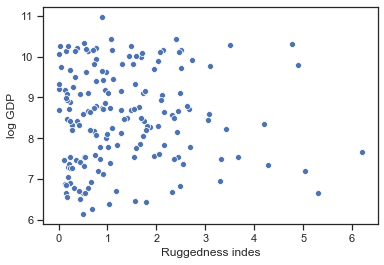

In [3]:
# I prepared a class that fetches data for you
PM = sr.PracticalMaterial()
X, y = PM.fetch_data()

# Let us plot data
sns.scatterplot(X, y)
print("Problem dimensions are", X.shape)
plt.ylabel("log GDP")
plt.xlabel("Ruggedness indes")
plt.show()

Say you work for a geographer. She wants to test the hypothesis that the log GDP increases with ruggedness. You reply that without knowledge about how $X$ and $y$ relate, and only 170 points, it seems reasonable to stick to a simple model, say linear regression. 

**Question:** Assuming you perform a linear regression of the log GDP onto the ruggedness index, how will you formalize the test that the geographer is asking for? What quantity do you want to report?

**Solution:** As Bayesians, we need a distribution over states and a loss function.
1. Linear regression and a choice of prior will give us a joint distribution $\pi$ over states $s=(X, y, \theta)$, where $\theta=(\alpha,\beta,\sigma)$, $y=\alpha+X\beta+\epsilon$, and, for example, $\epsilon\sim\mathcal{N}(0,\sigma^2)$. 
2. The geographer's action can be modeled by a binary variable: yes/no depending on whether GDP increases with ruggedness. She should tell us how much she would suffer if we answered yes/no and the state was $s$. We propose
$$
L(a,s) = \ell_1 1_{\beta>0}1_{a=0} + \ell_2 1_{\beta\leq 0} 1_{a=1}.
$$
The Bayes action is then to say 'yes' (a=1) if and only if
$$ 
\pi(\beta>0\vert X,y) > \frac{\ell_2}{\ell_1+\ell_2}.
$$


# Linear regression

**Question:** First write down your model (likelihood and prior), and find the MAP to get an idea what to expect.

* Prior is $p(\theta) = p(\alpha,\beta,\log\sigma) = \mathcal{N}((0,0,0),I).$ Also try a Student, a Cauchy (in which case there's no variance).
* Likelihood is $p(\mathbf{y}\vert X, \theta) = \prod_{i=1}^n \mathcal{N}(y_i\vert \alpha+\beta x_i, \sigma^2)$.
* Posterior is proportional to 
$$ p(\theta\vert X,y) \propto p(\mathbf{y}\vert X, \theta)p(\theta).$$

In [ ]:
theta_map, inverse_hessian = PM.find_map()
print(theta_map, np.diag(inverse_hessian))

In [ ]:
sns.scatterplot(X, y)
plt.ylabel("log GDP")
plt.xlabel("Ruggedness indes")
plt.plot(X, theta_map[0] + theta_map[1]*X, label="map", color="orange")
plt.legend()
plt.show()

**Question:** we haven't performed Bayesian inference yet, but do you interpret the MAP as evidence for a yes or a no?

**Question:** perform a Laplace approximation to the posterior, what would you then answer to the geographer? *Hint: we have already computed everything for the Laplace approximation, so answering this question should require no coding.*

# Importance sampling
The number of parameters is $3$, this is low enough that we can hope importance sampling to yield small variance. We are first going to implement a generic class for self-normalized importance sampling, with a target given by its log.

**Question:** Fill out the methods of the `ImportanceSampling` class, and test it on a few integrals for which you know a closed form. For instance, find one integral that is easy for IS with a Gaussian proposal, and one that is hard. Then change the proposal to try to make your hard integral more tractable. 

**Question:** In all cases, compute the essential sample size and try to see if it is a useful diagnostic. 

In [ ]:
sr.run_tests()

# Inferring the linear regression parameters

**Question:** Now we turn to inferring the parameters, how big can you make the ESS by tuning the proposal?

In [ ]:
IS = sr.ImportanceSampling(dimension=3, log_target=PM.get_log_target, 
                           num_samples=1000)
IS.find_map(verbose=True)
IS.propose()
res = IS.get_estimate(lambda theta:theta)
print("theta_MEP is", res, "and ESS per sample is", IS.get_ess_per_sample())

**Question:** Perform posterior visualisation: Fill in the `get_sample` method if you haven't done so yet, and show a few lines corresponding to approximate posterior samples on the scatter plot of the data. 

**Question:** And now, what do we answer our geographer? How sensitive is your decision to your choice of prior?

**Question:** Now the geographer tells you that she is twice more sensitive to announcing that GDP increases with ruggedness while it doesn't, than the contrary. Does that change your decision? 